In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


In [2]:
df=pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


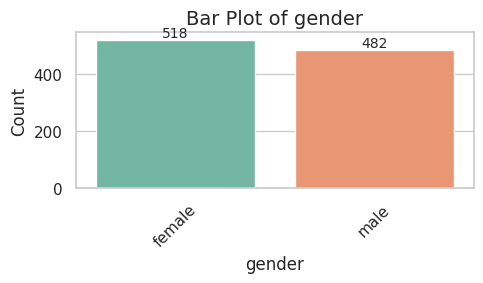

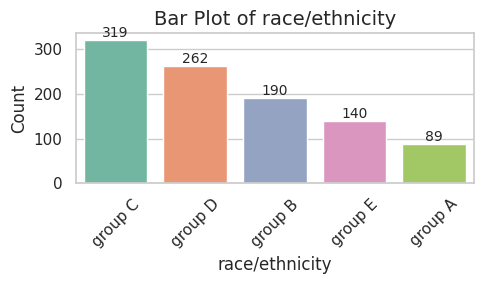

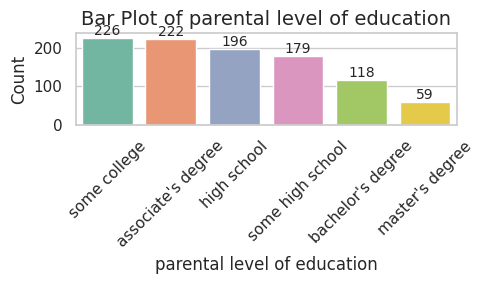

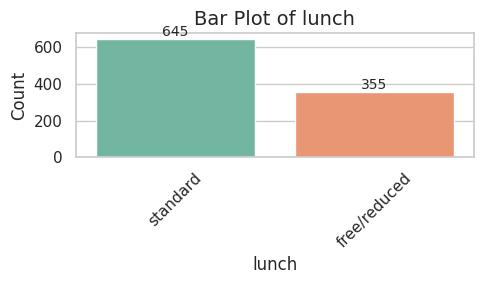

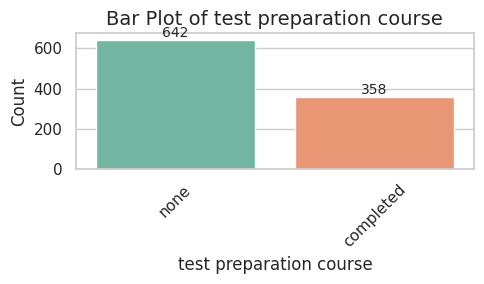

In [6]:
# Set modern style
sns.set(style="whitegrid", palette="Set2")

# Loop through object-type columns
for col in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(5, 3))
    
    # Count plot
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=45)

    # Add value labels
    for p in ax.patches:
        value = int(p.get_height())
        ax.annotate(f'{value}', 
                    (p.get_x() + p.get_width() / 2., value),
                    ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

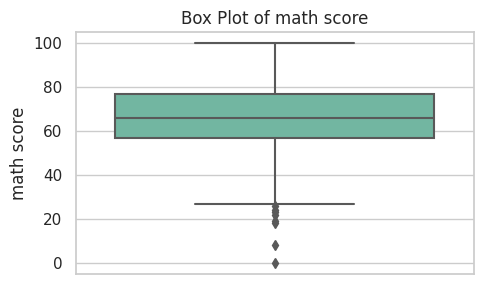

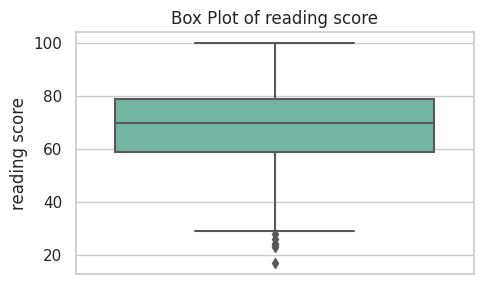

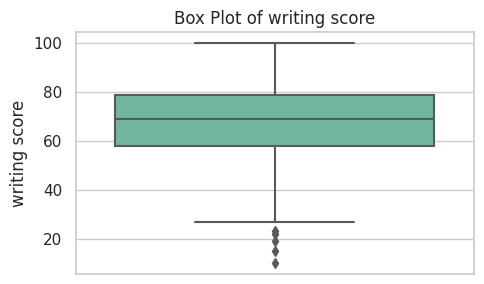

In [7]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [8]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    print(col)
    print(df[df[col]<20].shape)
    print('--'*20)

math score
(4, 8)
----------------------------------------
reading score
(1, 8)
----------------------------------------
writing score
(3, 8)
----------------------------------------


In [9]:
df.shape

(1000, 8)

In [10]:
df[(df['math score'] > 20) & (df['reading score'] > 20) & (df['writing score'] > 20)].shape


(994, 8)

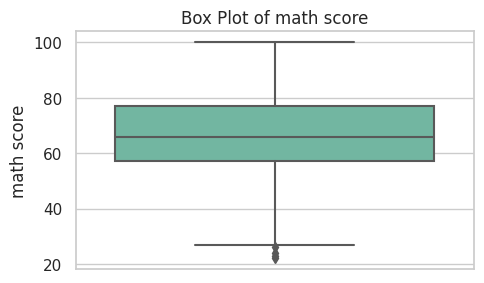

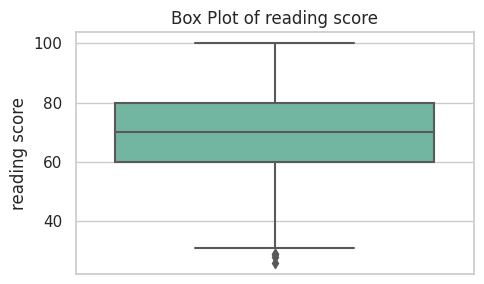

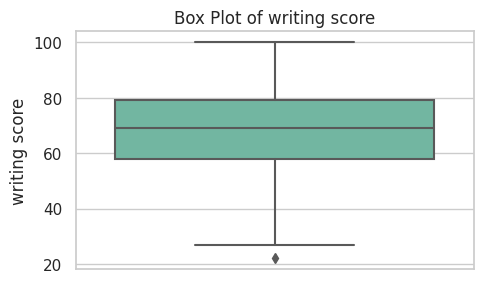

In [11]:
dff=df[(df['math score'] > 20) & (df['reading score'] > 20) & (df['writing score'] > 20)]
for col in dff.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=dff, y=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

In [12]:
df=dff.copy()

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [15]:
df.select_dtypes(include='object').columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [16]:
for col in df.select_dtypes(include='object').columns:
    df[col]=labelencoder.fit_transform(df[col])

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [18]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [19]:
df['avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_score
0,0,1,1,1,1,72,72,74,72.666667
1,0,2,4,1,0,69,90,88,82.333333
2,0,1,3,1,1,90,95,93,92.666667
3,1,0,0,0,1,47,57,44,49.333333
4,1,2,4,1,1,76,78,75,76.333333


In [21]:
df=df.drop(columns=['math score', 'reading score','writing score'],axis=1)

In [22]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,avg_score
0,0,1,1,1,1,72.666667
1,0,2,4,1,0,82.333333
2,0,1,3,1,1,92.666667
3,1,0,0,0,1,49.333333
4,1,2,4,1,1,76.333333


<h3>Now You Can Performed Any Machine Learninh Model On Above Cleaned Dataset</h3>